In [1297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [1298]:
from ipywidgets import interact, FloatSlider

In [1299]:
import warnings
warnings.filterwarnings('ignore')

In [1300]:
# from google.colab import drive
# drive.mount('/content/drive')
# df=pd.read_csv('/content/drive/MyDrive/CSV/data_iu_1922_proccessed.csv', dtype={'IDToHocP': 'Int64'})

In [1301]:
#Import Local csv

file_path = './data/data_iu_proccessed_p1.csv'
# file_path = './data/data_iu_proccessed_p1_v2.csv'
# file_path = './data/data_iu_proccessed_p1_20231.csv'

# Define the data types for each column
data_types = {'IDToHocP': 'Int64'}  # 'Int64' allows for NaN and keeps the integer type

# Read the CSV file with specified data types
df = pd.read_csv(file_path, dtype=data_types)

In [1302]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [1303]:
df.shape

(283156, 21)

In [1304]:
df.head(5)

,Unnamed: 0,MaSV,GioiTinh,TenDayDu,TenMH,MaMH,MaDV,NgayThem,NHHK,SoTinChi,SiSoTKB,DiemHP,MaNV,IDNV,IDToHoc,IDToHocP,TenDayDuNV_LT,TenDayDuNV_TH,TKB_LT,TKB_TH,MH-GV
0,0,BA20EX003,0.0,Parkkonen Ilari Armas,Principles of Marketing,BA003IU,BA BA,2020-09-16 10:06:14.000,20201,3,80.0,80,BA041,-5058869372650414947,-7511537954055589802,<NA>,Do Nguyen Phuong Van,NaN,"[0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0]","IS062IU-20201-Nguyen Van Hop--[0, 7, 0, 0, 0, ..."
1,1,BA20EX003,0.0,Parkkonen Ilari Armas,Sales Management,BA032IU,BA BA,2020-09-15 22:04:32.000,20201,3,40.0,92,0369,-6705555954088497726,-9111318994865561716,<NA>,Trinh Viet Dung,NaN,"[0, 1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","IS067IU-20201-Duong Vo Nhi Anh--[0, 0, 1, 0, 0..."
2,2,BA20EX003,0.0,Parkkonen Ilari Armas,Production Management,IS019IU,IEMIEM,2020-09-07 08:22:00.000,20201,3,100.0,85,0565,-8312171419812833918,-5589081270312655230,<NA>,Tran Van Ly,NaN,"[0, 0, 7, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","IS045IU-20201-Pham Huynh Tram--[0, 0, 0, 0, 1,..."
3,3,BA20EX003,0.0,Parkkonen Ilari Armas,Systems Engineering,IS035IU,IEMIEM,2020-09-07 08:22:00.000,20201,3,80.0,67,0393,-6554087832232116869,-8397277134340552949,<NA>,Dao Vu Truong Son,NaN,"[4, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","BA003IU-20201-Do Nguyen Phuong Van--[0, 0, 0, ..."
4,4,BA20EX003,0.0,Parkkonen Ilari Armas,Leadership,IS045IU,IEMIEM,2020-09-07 08:22:00.000,20201,3,50.0,81,0247,-4788312306448078665,-7350599281615937946,<NA>,Pham Huynh Tram,NaN,"[0, 0, 0, 0, 1, 0]","[0, 0, 0, 0, 0, 0]","IS019IU-20201-Tran Van Ly--[0, 0, 7, 0, 0, 0]-..."


In [1305]:
df.dtypes

Unnamed: 0         int64
MaSV              object
GioiTinh         float64
TenDayDu          object
TenMH             object
MaMH              object
MaDV              object
NgayThem          object
NHHK               int64
SoTinChi           int64
SiSoTKB          float64
DiemHP            object
MaNV              object
IDNV               int64
IDToHoc            int64
IDToHocP           Int64
TenDayDuNV_LT     object
TenDayDuNV_TH     object
TKB_LT            object
TKB_TH            object
MH-GV             object
dtype: object

In [1306]:
 columns_to_drop=['Unnamed: 0']
 df = df.drop(columns=columns_to_drop)

In [1307]:
df['MH_full'] = df['MaMH'].astype(str) + '_' +df['NHHK'].astype(str) + '_' +df['TenDayDuNV_LT'].astype(str) + '_' + df['TenDayDuNV_TH'].astype(str)+ '_' +df['TKB_LT']+ '_' +df['TKB_TH']

In [1308]:
df.head(5)

,MaSV,GioiTinh,TenDayDu,TenMH,MaMH,MaDV,NgayThem,NHHK,SoTinChi,SiSoTKB,DiemHP,MaNV,IDNV,IDToHoc,IDToHocP,TenDayDuNV_LT,TenDayDuNV_TH,TKB_LT,TKB_TH,MH-GV,MH_full
0,BA20EX003,0.0,Parkkonen Ilari Armas,Principles of Marketing,BA003IU,BA BA,2020-09-16 10:06:14.000,20201,3,80.0,80,BA041,-5058869372650414947,-7511537954055589802,<NA>,Do Nguyen Phuong Van,NaN,"[0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0]","IS062IU-20201-Nguyen Van Hop--[0, 7, 0, 0, 0, ...","BA003IU_20201_Do Nguyen Phuong Van_nan_[0, 0, ..."
1,BA20EX003,0.0,Parkkonen Ilari Armas,Sales Management,BA032IU,BA BA,2020-09-15 22:04:32.000,20201,3,40.0,92,0369,-6705555954088497726,-9111318994865561716,<NA>,Trinh Viet Dung,NaN,"[0, 1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","IS067IU-20201-Duong Vo Nhi Anh--[0, 0, 1, 0, 0...","BA032IU_20201_Trinh Viet Dung_nan_[0, 1, 0, 0,..."
2,BA20EX003,0.0,Parkkonen Ilari Armas,Production Management,IS019IU,IEMIEM,2020-09-07 08:22:00.000,20201,3,100.0,85,0565,-8312171419812833918,-5589081270312655230,<NA>,Tran Van Ly,NaN,"[0, 0, 7, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","IS045IU-20201-Pham Huynh Tram--[0, 0, 0, 0, 1,...","IS019IU_20201_Tran Van Ly_nan_[0, 0, 7, 0, 0, ..."
3,BA20EX003,0.0,Parkkonen Ilari Armas,Systems Engineering,IS035IU,IEMIEM,2020-09-07 08:22:00.000,20201,3,80.0,67,0393,-6554087832232116869,-8397277134340552949,<NA>,Dao Vu Truong Son,NaN,"[4, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","BA003IU-20201-Do Nguyen Phuong Van--[0, 0, 0, ...","IS035IU_20201_Dao Vu Truong Son_nan_[4, 0, 0, ..."
4,BA20EX003,0.0,Parkkonen Ilari Armas,Leadership,IS045IU,IEMIEM,2020-09-07 08:22:00.000,20201,3,50.0,81,0247,-4788312306448078665,-7350599281615937946,<NA>,Pham Huynh Tram,NaN,"[0, 0, 0, 0, 1, 0]","[0, 0, 0, 0, 0, 0]","IS019IU-20201-Tran Van Ly--[0, 0, 7, 0, 0, 0]-...","IS045IU_20201_Pham Huynh Tram_nan_[0, 0, 0, 0,..."


In [1309]:
df.shape

(283156, 21)

In [1310]:
 columns_to_drop=['MH-GV']
 df = df.drop(columns=columns_to_drop)

In [1311]:
df.columns

Index(['MaSV', 'GioiTinh', 'TenDayDu', 'TenMH', 'MaMH', 'MaDV', 'NgayThem',
       'NHHK', 'SoTinChi', 'SiSoTKB', 'DiemHP', 'MaNV', 'IDNV', 'IDToHoc',
       'IDToHocP', 'TenDayDuNV_LT', 'TenDayDuNV_TH', 'TKB_LT', 'TKB_TH',
       'MH_full'],
      dtype='object')

In [1312]:
df.head(5)

,MaSV,GioiTinh,TenDayDu,TenMH,MaMH,MaDV,NgayThem,NHHK,SoTinChi,SiSoTKB,DiemHP,MaNV,IDNV,IDToHoc,IDToHocP,TenDayDuNV_LT,TenDayDuNV_TH,TKB_LT,TKB_TH,MH_full
0,BA20EX003,0.0,Parkkonen Ilari Armas,Principles of Marketing,BA003IU,BA BA,2020-09-16 10:06:14.000,20201,3,80.0,80,BA041,-5058869372650414947,-7511537954055589802,<NA>,Do Nguyen Phuong Van,NaN,"[0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0]","BA003IU_20201_Do Nguyen Phuong Van_nan_[0, 0, ..."
1,BA20EX003,0.0,Parkkonen Ilari Armas,Sales Management,BA032IU,BA BA,2020-09-15 22:04:32.000,20201,3,40.0,92,0369,-6705555954088497726,-9111318994865561716,<NA>,Trinh Viet Dung,NaN,"[0, 1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","BA032IU_20201_Trinh Viet Dung_nan_[0, 1, 0, 0,..."
2,BA20EX003,0.0,Parkkonen Ilari Armas,Production Management,IS019IU,IEMIEM,2020-09-07 08:22:00.000,20201,3,100.0,85,0565,-8312171419812833918,-5589081270312655230,<NA>,Tran Van Ly,NaN,"[0, 0, 7, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","IS019IU_20201_Tran Van Ly_nan_[0, 0, 7, 0, 0, ..."
3,BA20EX003,0.0,Parkkonen Ilari Armas,Systems Engineering,IS035IU,IEMIEM,2020-09-07 08:22:00.000,20201,3,80.0,67,0393,-6554087832232116869,-8397277134340552949,<NA>,Dao Vu Truong Son,NaN,"[4, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","IS035IU_20201_Dao Vu Truong Son_nan_[4, 0, 0, ..."
4,BA20EX003,0.0,Parkkonen Ilari Armas,Leadership,IS045IU,IEMIEM,2020-09-07 08:22:00.000,20201,3,50.0,81,0247,-4788312306448078665,-7350599281615937946,<NA>,Pham Huynh Tram,NaN,"[0, 0, 0, 0, 1, 0]","[0, 0, 0, 0, 0, 0]","IS045IU_20201_Pham Huynh Tram_nan_[0, 0, 0, 0,..."


#Loop through the Subjects

In [1313]:
# Converting the Datetime to Time with respect to 0:00:00
df['NgayThem'] = pd.to_datetime(df['NgayThem'])
df['NgayThem_time'] = df['NgayThem'].dt.strftime('%H:%M:%S')

# Convert the time values to a numerical format (seconds since midnight)
df['Time_seconds'] = df['NgayThem'].dt.hour * 3600 + df['NgayThem'].dt.minute * 60 + df['NgayThem'].dt.second

In [1314]:
df.head(5)

,MaSV,GioiTinh,TenDayDu,TenMH,MaMH,MaDV,NgayThem,NHHK,SoTinChi,SiSoTKB,DiemHP,MaNV,IDNV,IDToHoc,IDToHocP,TenDayDuNV_LT,TenDayDuNV_TH,TKB_LT,TKB_TH,MH_full,NgayThem_time,Time_seconds
0,BA20EX003,0.0,Parkkonen Ilari Armas,Principles of Marketing,BA003IU,BA BA,2020-09-16 10:06:14,20201,3,80.0,80,BA041,-5058869372650414947,-7511537954055589802,<NA>,Do Nguyen Phuong Van,NaN,"[0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0]","BA003IU_20201_Do Nguyen Phuong Van_nan_[0, 0, ...",10:06:14,36374
1,BA20EX003,0.0,Parkkonen Ilari Armas,Sales Management,BA032IU,BA BA,2020-09-15 22:04:32,20201,3,40.0,92,0369,-6705555954088497726,-9111318994865561716,<NA>,Trinh Viet Dung,NaN,"[0, 1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","BA032IU_20201_Trinh Viet Dung_nan_[0, 1, 0, 0,...",22:04:32,79472
2,BA20EX003,0.0,Parkkonen Ilari Armas,Production Management,IS019IU,IEMIEM,2020-09-07 08:22:00,20201,3,100.0,85,0565,-8312171419812833918,-5589081270312655230,<NA>,Tran Van Ly,NaN,"[0, 0, 7, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","IS019IU_20201_Tran Van Ly_nan_[0, 0, 7, 0, 0, ...",08:22:00,30120
3,BA20EX003,0.0,Parkkonen Ilari Armas,Systems Engineering,IS035IU,IEMIEM,2020-09-07 08:22:00,20201,3,80.0,67,0393,-6554087832232116869,-8397277134340552949,<NA>,Dao Vu Truong Son,NaN,"[4, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","IS035IU_20201_Dao Vu Truong Son_nan_[4, 0, 0, ...",08:22:00,30120
4,BA20EX003,0.0,Parkkonen Ilari Armas,Leadership,IS045IU,IEMIEM,2020-09-07 08:22:00,20201,3,50.0,81,0247,-4788312306448078665,-7350599281615937946,<NA>,Pham Huynh Tram,NaN,"[0, 0, 0, 0, 1, 0]","[0, 0, 0, 0, 0, 0]","IS045IU_20201_Pham Huynh Tram_nan_[0, 0, 0, 0,...",08:22:00,30120


In [1315]:
df.dtypes

MaSV                     object
GioiTinh                float64
TenDayDu                 object
TenMH                    object
MaMH                     object
MaDV                     object
NgayThem         datetime64[ns]
NHHK                      int64
SoTinChi                  int64
SiSoTKB                 float64
DiemHP                   object
MaNV                     object
IDNV                      int64
IDToHoc                   int64
IDToHocP                  Int64
TenDayDuNV_LT            object
TenDayDuNV_TH            object
TKB_LT                   object
TKB_TH                   object
MH_full                  object
NgayThem_time            object
Time_seconds              int32
dtype: object

In [1316]:
# 28800 = 8, 30000 = 8:20, 39600 = 11, 46800 = 13, 61200 = 17
#----------------------------------------------------------------
# 8:00 (28800 seconds)
# 9:00 (28800 + 3600 = 32400 seconds)
# 10:00 (32400 + 3600 = 36000 seconds)
# 11:00 (36000 + 3600 = 39600 seconds)
# 12:00 (39600 + 3600 = 43200 seconds)
# 13:00 (43200 + 3600 = 46800 seconds)
# 14:00 (46800 + 3600 = 50400 seconds)
# 15:00 (50400 + 3600 = 54000 seconds)
# 16:00 (54000 + 3600 = 57600 seconds)
# 17:00 (57600 + 3600 = 61200 seconds)
#----------------------------------------------------------------
#Method 1 - If_else
def map_to_range(time):
    if 28800 <= time < 32400: 
        return 1  # 8-9: 1
    elif 32400 <= time < 36000:
        return 2  # 9-10: 2
    elif 36000 <= time < 39600:
        return 3  # 10-11: 3
    elif 32400 <= time < 43200:
        return 4  # 11-12: 4
    elif 43200 <= time < 46800:
        return 5  # 12-13: 5
    elif 46800 <= time < 50400:
        return 6  # 13-14: 6
    elif 50400 <= time < 54000:
        return 7  # 14-15: 7
    elif 54000 <= time < 57600:
        return 8  # 15-16: 8
    elif 57600 <= time < 61200:
        return 9  # 16-17: 9
    else:
        return 10 #after 17
#----------------------------------------------------------------   
#Method 2 - Interval 3600
# def map_to_range(time):
#     # Calculate hour from timestamp
#     hour = (time - 28800) // 3600 + 1  # 3600 seconds = 1 hour, and adding 1 to start from 1 instead of 0

#     # Map the hour to one of the 15 intervals
#     if hour <= 0:
#         return 1
#     elif hour <= 15:
#         return hour
#     else:
#         return 16  # Return 16 for time greater than or equal to 17:00
#----------------------------------------------------------------
# Apply the function to create a new column
df['time_range'] = df['Time_seconds'].apply(lambda x: map_to_range(x))

In [1317]:
df.head(5)

,MaSV,GioiTinh,TenDayDu,TenMH,MaMH,MaDV,NgayThem,NHHK,SoTinChi,SiSoTKB,DiemHP,MaNV,IDNV,IDToHoc,IDToHocP,TenDayDuNV_LT,TenDayDuNV_TH,TKB_LT,TKB_TH,MH_full,NgayThem_time,Time_seconds,time_range
0,BA20EX003,0.0,Parkkonen Ilari Armas,Principles of Marketing,BA003IU,BA BA,2020-09-16 10:06:14,20201,3,80.0,80,BA041,-5058869372650414947,-7511537954055589802,<NA>,Do Nguyen Phuong Van,NaN,"[0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 0]","BA003IU_20201_Do Nguyen Phuong Van_nan_[0, 0, ...",10:06:14,36374,3
1,BA20EX003,0.0,Parkkonen Ilari Armas,Sales Management,BA032IU,BA BA,2020-09-15 22:04:32,20201,3,40.0,92,0369,-6705555954088497726,-9111318994865561716,<NA>,Trinh Viet Dung,NaN,"[0, 1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","BA032IU_20201_Trinh Viet Dung_nan_[0, 1, 0, 0,...",22:04:32,79472,10
2,BA20EX003,0.0,Parkkonen Ilari Armas,Production Management,IS019IU,IEMIEM,2020-09-07 08:22:00,20201,3,100.0,85,0565,-8312171419812833918,-5589081270312655230,<NA>,Tran Van Ly,NaN,"[0, 0, 7, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","IS019IU_20201_Tran Van Ly_nan_[0, 0, 7, 0, 0, ...",08:22:00,30120,1
3,BA20EX003,0.0,Parkkonen Ilari Armas,Systems Engineering,IS035IU,IEMIEM,2020-09-07 08:22:00,20201,3,80.0,67,0393,-6554087832232116869,-8397277134340552949,<NA>,Dao Vu Truong Son,NaN,"[4, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","IS035IU_20201_Dao Vu Truong Son_nan_[4, 0, 0, ...",08:22:00,30120,1
4,BA20EX003,0.0,Parkkonen Ilari Armas,Leadership,IS045IU,IEMIEM,2020-09-07 08:22:00,20201,3,50.0,81,0247,-4788312306448078665,-7350599281615937946,<NA>,Pham Huynh Tram,NaN,"[0, 0, 0, 0, 1, 0]","[0, 0, 0, 0, 0, 0]","IS045IU_20201_Pham Huynh Tram_nan_[0, 0, 0, 0,...",08:22:00,30120,1


In [1318]:
df.shape

(283156, 23)

In [1319]:
# test_df = df[df['MaMH'] == "IT056IU"]
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_colwidth', None)
# test_df

In [1320]:
# test_df.shape

In [1321]:
# test_df = df[df['MaMH'] == "MA023IU"] 
test_df = df[(df['MaMH'] == "EE057IU") & (df['NHHK'] == 20201)]
test_df['Major'] = test_df['MaSV'].str[:2]

# Create a global colormap
unique_majors = test_df['Major'].unique()
colors = plt.cm.get_cmap('tab20', len(unique_majors))

# Create a mapping from Major values to colors
color_dict = {val: colors(i) for i, val in enumerate(unique_majors)}

In [1322]:
# print("Color dictionary:", color_dict)

In [1323]:
# # Print all unique 'Major' values using pandas
# unique_majors = test_df['Major'].unique()
# print(unique_majors)

In [1324]:
test_df

,MaSV,GioiTinh,TenDayDu,TenMH,MaMH,MaDV,NgayThem,NHHK,SoTinChi,SiSoTKB,DiemHP,MaNV,IDNV,IDToHoc,IDToHocP,TenDayDuNV_LT,TenDayDuNV_TH,TKB_LT,TKB_TH,MH_full,NgayThem_time,Time_seconds,time_range,Major
143889,BTCEIU17001,0.0,Lê Trương Quốc Thịnh,Programming for Engineers (C),EE057IU,EE EE,2020-08-15 08:35:00,20201,3,40.0,85,0632,-5322491914153795967,-5533535117346354040,<NA>,Huynh Tan Quoc,NaN,"[0, 4, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","EE057IU_20201_Huynh Tan Quoc_nan_[0, 4, 0, 0, ...",08:35:00,30900,1,BT
143991,BTCEIU18013,1.0,Nguyễn Ngọc Khánh Hân,Programming for Engineers (C),EE057IU,EE EE,2020-08-15 08:55:00,20201,3,40.0,54,0632,-5322491914153795967,-5533535117346354040,<NA>,Huynh Tan Quoc,NaN,"[0, 4, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","EE057IU_20201_Huynh Tan Quoc_nan_[0, 4, 0, 0, ...",08:55:00,32100,1,BT
144085,BTCEIU18024,1.0,Lai Cẩm Khuê,Programming for Engineers (C),EE057IU,EE EE,2020-08-15 09:26:00,20201,3,40.0,90,0632,-5322491914153795967,-5533535117346354040,<NA>,Huynh Tan Quoc,NaN,"[0, 4, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","EE057IU_20201_Huynh Tan Quoc_nan_[0, 4, 0, 0, ...",09:26:00,33960,2,BT
144183,BTCEIU18056,0.0,Trần Thanh Tùng,Programming for Engineers (C),EE057IU,EE EE,2020-08-15 09:07:00,20201,3,40.0,88,0632,-5322491914153795967,-5533535117346354040,<NA>,Huynh Tan Quoc,NaN,"[0, 4, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","EE057IU_20201_Huynh Tan Quoc_nan_[0, 4, 0, 0, ...",09:07:00,32820,2,BT
144228,BTCEIU18057,0.0,Hồ Nguyên Lãm,Programming for Engineers (C),EE057IU,EE EE,2020-08-15 09:15:00,20201,3,40.0,32,0632,-5322491914153795967,-5533535117346354040,<NA>,Huynh Tan Quoc,NaN,"[0, 4, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","EE057IU_20201_Huynh Tan Quoc_nan_[0, 4, 0, 0, ...",09:15:00,33300,2,BT
144319,BTCEIU18062,1.0,Nguyễn Thị Tuyết Ngân,Programming for Engineers (C),EE057IU,EE EE,2020-08-15 09:06:00,20201,3,40.0,52,0632,-5322491914153795967,-5533535117346354040,<NA>,Huynh Tan Quoc,NaN,"[0, 4, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","EE057IU_20201_Huynh Tan Quoc_nan_[0, 4, 0, 0, ...",09:06:00,32760,2,BT
144404,BTCEIU18066,0.0,Đặng Hoàng Phúc,Programming for Engineers (C),EE057IU,EE EE,2020-08-15 08:46:00,20201,3,40.0,57,0632,-5322491914153795967,-5533535117346354040,<NA>,Huynh Tan Quoc,NaN,"[0, 4, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","EE057IU_20201_Huynh Tan Quoc_nan_[0, 4, 0, 0, ...",08:46:00,31560,1,BT
144496,BTCEIU18068,1.0,Nguyễn Thị Mỹ Hảo,Programming for Engineers (C),EE057IU,EE EE,2020-08-15 09:31:00,20201,3,40.0,65,0632,-5322491914153795967,-5533535117346354040,<NA>,Huynh Tan Quoc,NaN,"[0, 4, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","EE057IU_20201_Huynh Tan Quoc_nan_[0, 4, 0, 0, ...",09:31:00,34260,2,BT
144537,BTCEIU18069,0.0,Ngô Hồng Ân,Programming for Engineers (C),EE057IU,EE EE,2020-08-15 09:43:00,20201,3,40.0,67,0632,-5322491914153795967,-5533535117346354040,<NA>,Huynh Tan Quoc,NaN,"[0, 4, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","EE057IU_20201_Huynh Tan Quoc_nan_[0, 4, 0, 0, ...",09:43:00,34980,2,BT
144573,BTCEIU18072,1.0,Lâm Huế Anh,Programming for Engineers (C),EE057IU,EE EE,2020-08-15 09:25:00,20201,3,40.0,71,0632,-5322491914153795967,-5533535117346354040,<NA>,Huynh Tan Quoc,NaN,"[0, 4, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","EE057IU_20201_Huynh Tan Quoc_nan_[0, 4, 0, 0, ...",09:25:00,33900,2,BT


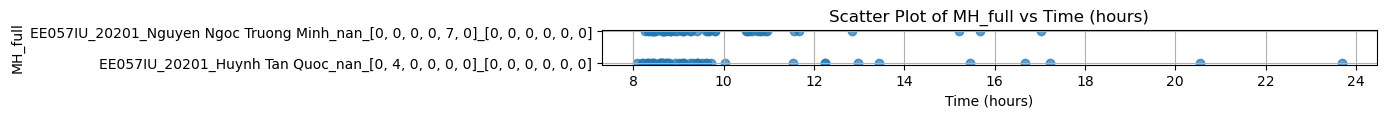

In [1325]:
# Filter the dataframe based on Time_seconds range
filtered_df = test_df[(test_df['Time_seconds'] >= 28800) & (test_df['Time_seconds'] <= 86400)]
# filtered_df = test_df[(test_df['Time_seconds'] >= 28800) & (test_df['Time_seconds'] <= 43200)]
# filtered_df = test_df[(test_df['Time_seconds'] >= 28800) & (test_df['Time_seconds'] <= 36000)]


# Convert Time_seconds to hours using .loc to avoid SettingWithCopyWarning
filtered_df.loc[:, 'Time_hours'] = filtered_df['Time_seconds'] / 3600

# Calculate the number of rows in the filtered DataFrame
num_rows = len(filtered_df)

# Determine the y-size of the plot based on the number of rows
# ysize = max(2, num_rows * 0.005)  # Set a minimum height of 6 inches
ysize = num_rows * 0.005 

# Create the scatter plot with dynamically adjusted size
plt.figure(figsize=(10, ysize))

plt.scatter(filtered_df['Time_hours'], filtered_df['MH_full'], alpha=0.7)
plt.xlabel('Time (hours)')
plt.ylabel('MH_full')
plt.title('Scatter Plot of MH_full vs Time (hours)')
plt.grid(True)
plt.show()

In [1326]:
filtered_df.shape

(91, 25)

In [1327]:
# Function to create the scatter plot
def create_scatter_plot(step, plot_size):
    # Filter the dataframe based on Time_seconds range
    filtered_df = test_df[(test_df['Time_seconds'] >= 28800) & (test_df['Time_seconds'] <= 86400)].copy()

    # Convert Time_seconds to hours
    filtered_df['Time_hours'] = filtered_df['Time_seconds'] / 3600

    # Calculate the number of rows in the filtered DataFrame
    num_rows = len(filtered_df)

    # Determine the y-size of the plot based on the number of rows
    # ysize = max(2, num_rows * 0.005)  # Set a minimum height of 6 inches
    ysize = num_rows * 0.01 

    # Create the scatter plot with variable size
    plt.figure(figsize=(plot_size * 2, ysize))  # Adjust aspect ratio

    plt.scatter(filtered_df['Time_hours'], filtered_df['MH_full'], alpha=0.7)

    # Manually set the x-ticks and labels
    start_hour = 8  # 28800 seconds is 8 hours
    end_hour = 24  # 39600 seconds is 11 hours

    tick_positions = []
    tick_labels = []
    current_hour = start_hour

    while current_hour <= end_hour:
        tick_positions.append(current_hour)
        tick_labels.append(f"{int(current_hour):02d}:{int((current_hour % 1) * 60):02d}")
        current_hour += step

#     plt.xticks(tick_positions, tick_labels)

    plt.xlabel('Time (HH:MM)', fontsize=14)
    plt.ylabel('MH_full', fontsize=20)
    plt.title('Scatter Plot of MH_full vs Time (hours)', fontsize=16)
    plt.grid(True)
    plt.show()

# Create interactive sliders for step size and plot size
step_slider = FloatSlider(value=0.2, min=0.1, max=1.0, step=0.1, description='Step Size:')
size_slider = FloatSlider(value=10, min=5, max=20, step=1, description='Plot Size:')

# Display the interactive plot
interact(create_scatter_plot, step=step_slider, plot_size=size_slider)

interactive(children=(FloatSlider(value=0.2, description='Step Size:', max=1.0, min=0.1), FloatSlider(value=10…

<function __main__.create_scatter_plot(step, plot_size)>

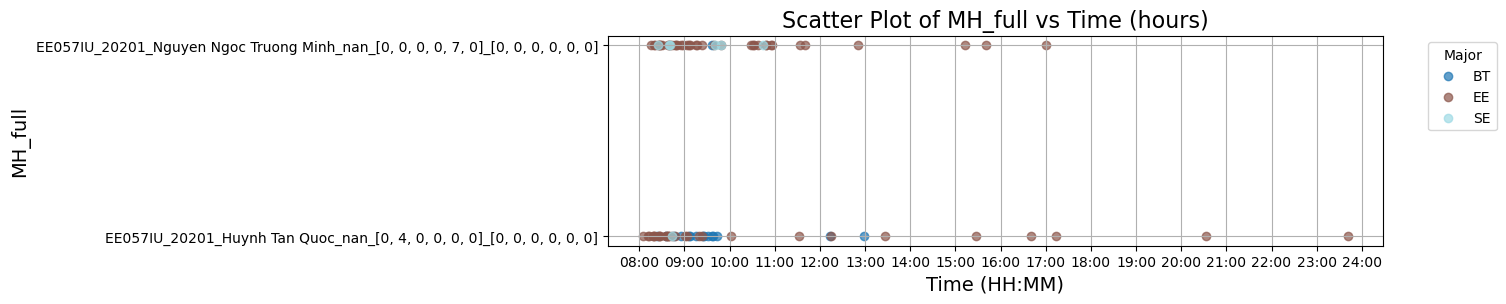

In [1328]:
# # Filter the dataframe based on Time_seconds range
# filtered_df = test_df[(test_df['Time_seconds'] >= 28800) & (test_df['Time_seconds'] <= 86400)].copy()
# # filtered_df = test_df[(test_df['Time_seconds'] >= 28800) & (test_df['Time_seconds'] <= 36000)].copy()

# # Convert Time_seconds to hours
# filtered_df['Time_hours'] = filtered_df['Time_seconds'] / 3600

# # Calculate the number of rows in the filtered DataFrame
# num_rows = len(filtered_df)

# # Determine the y-size of the plot based on the number of rows
# # ysize = max(2, num_rows * 0.005)  # Set a minimum height of 6 inches
# ysize = num_rows * 0.005 

# # Create the scatter plot
# plt.figure(figsize=(10, ysize))
# plt.scatter(filtered_df['Time_hours'], filtered_df['MH_full'], alpha=0.7)

# # Manually set the x-ticks and labels
# start_hour = 8  # 28800 seconds is 8 hours
# end_hour = 24  # 36000 seconds is 10 hours

# # Generate tick positions and labels
# tick_positions = []
# tick_labels = []
# current_hour = start_hour

# while current_hour <= end_hour:
#     tick_positions.append(current_hour)
#     tick_labels.append(f"{int(current_hour):02d}:{int((current_hour % 1) * 60):02d}")
#     current_hour += 1

# plt.xticks(tick_positions, tick_labels)

# plt.xlabel('Time (HH:MM)', fontsize=14)
# plt.ylabel('MH_full', fontsize=14)
# plt.title('Scatter Plot of MH_full vs Time (hours)', fontsize=16)
# plt.grid(True)
# plt.show()

# Filter the dataframe based on Time_seconds range
filtered_df = test_df[(test_df['Time_seconds'] >= 28800) & (test_df['Time_seconds'] <= 86400)].copy()

# Convert Time_seconds to hours
filtered_df['Time_hours'] = filtered_df['Time_seconds'] / 3600

# Calculate the number of rows in the filtered DataFrame
num_rows = len(filtered_df)

# Determine the y-size of the plot based on the number of rows
ysize = num_rows * 0.03

# # # Create the scatter plot
# plt.figure(figsize=(10, ysize))
# for value in unique_values:
#     subset = filtered_df[filtered_df['Major'] == value]
#     plt.scatter(subset['Time_hours'], subset['MH_full'], alpha=0.7, label=value, color=color_dict[value])
# Create the scatter plot
plt.figure(figsize=(10, ysize))
for major in unique_majors:
    subset = filtered_df[filtered_df['Major'] == major]
    plt.scatter(subset['Time_hours'], subset['MH_full'], alpha=0.7, label=major, color=color_dict[major])
    
# Iterate over unique major values to plot each subset with the correct color
# for value in unique_values:
#     if value in color_dict:
#         subset = filtered_df[filtered_df['Major'] == value]
#         plt.scatter(subset['Time_hours'], subset['MH_full'], alpha=0.7, label=value, color=color_dict[value])
#     else:
#         print(f"Warning: No color mapping for Major value '{value}'")


# Manually set the x-ticks and labels
start_hour = 8  # 28800 seconds is 8 hours
end_hour = 24  # 86400 seconds is 24 hours

# Generate tick positions and labels
tick_positions = []
tick_labels = []
current_hour = start_hour

while current_hour <= end_hour:
    tick_positions.append(current_hour)
    tick_labels.append(f"{int(current_hour):02d}:{int((current_hour % 1) * 60):02d}")
    current_hour += 1

plt.xticks(tick_positions, tick_labels)

plt.xlabel('Time (HH:MM)', fontsize=14)
plt.ylabel('MH_full', fontsize=14)
plt.title('Scatter Plot of MH_full vs Time (hours)', fontsize=16)
plt.grid(True)
# Place the legend to the right of the chart
plt.legend(title='Major', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

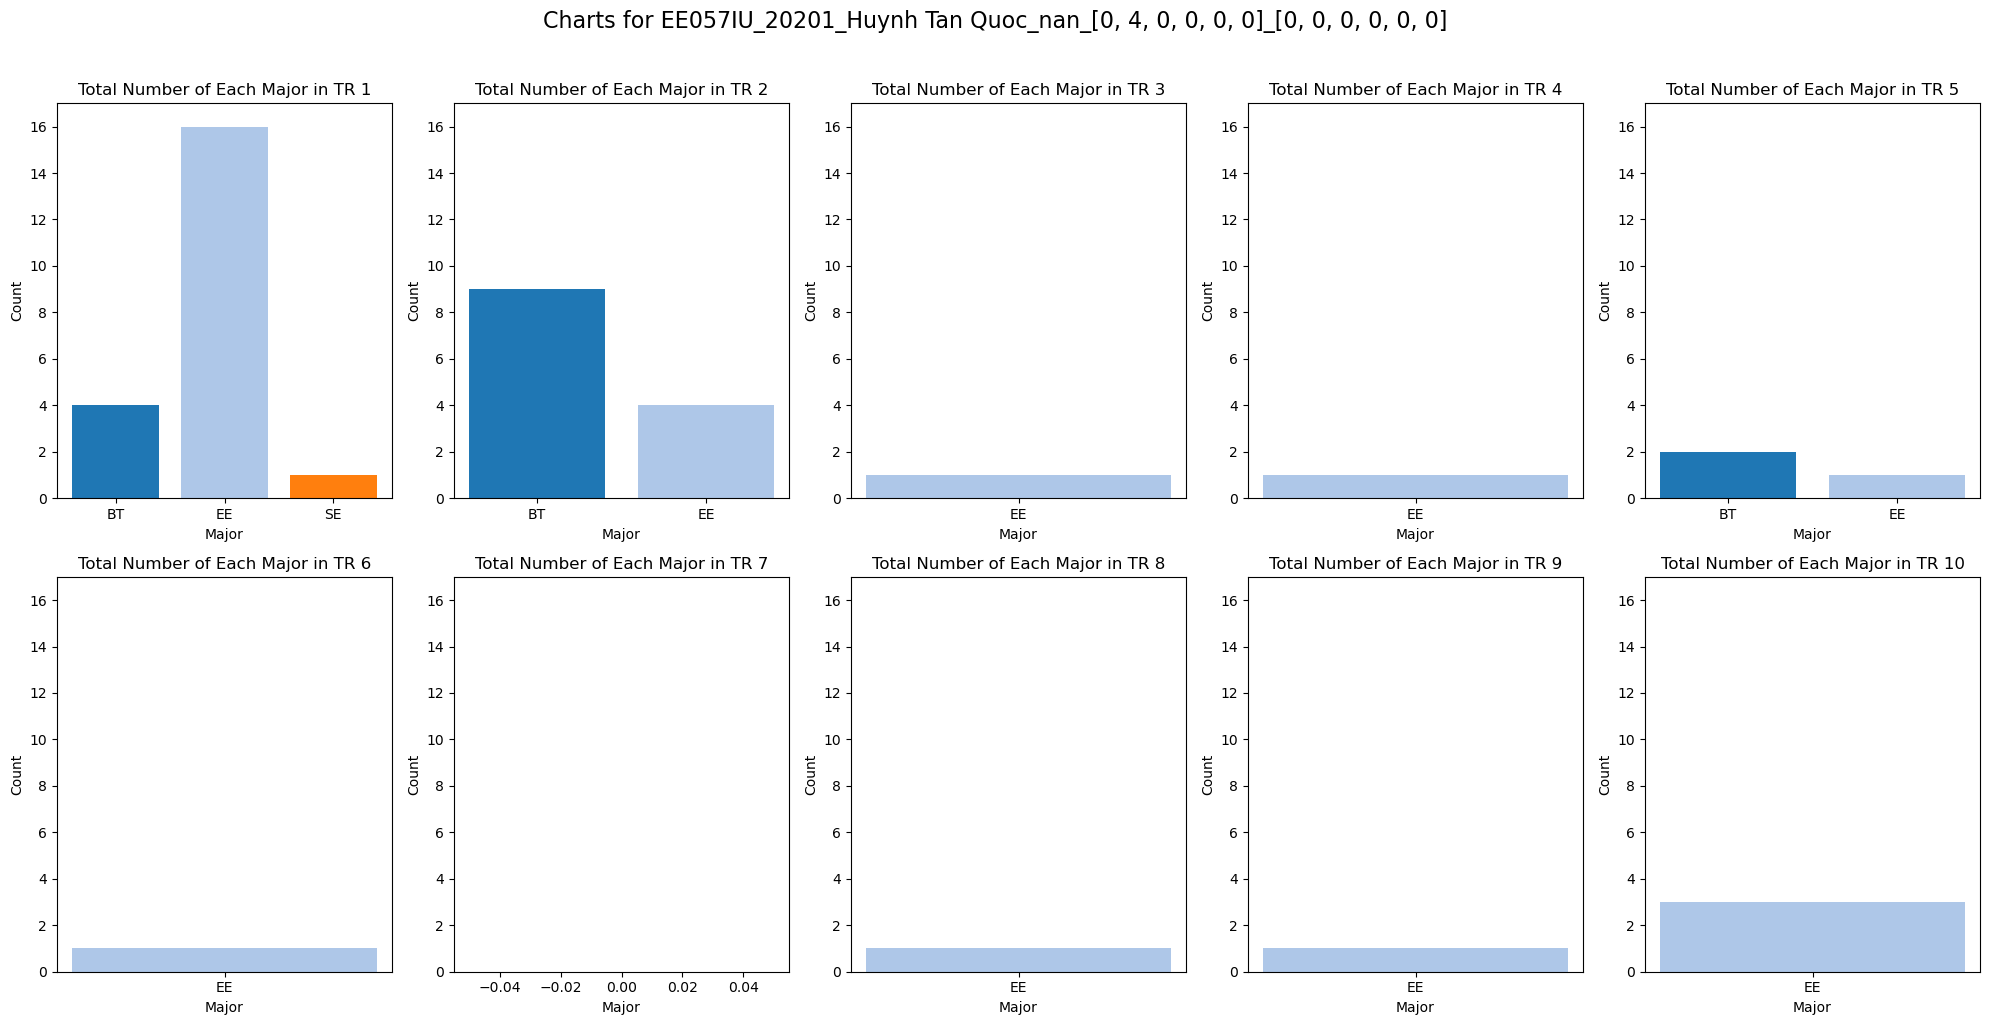

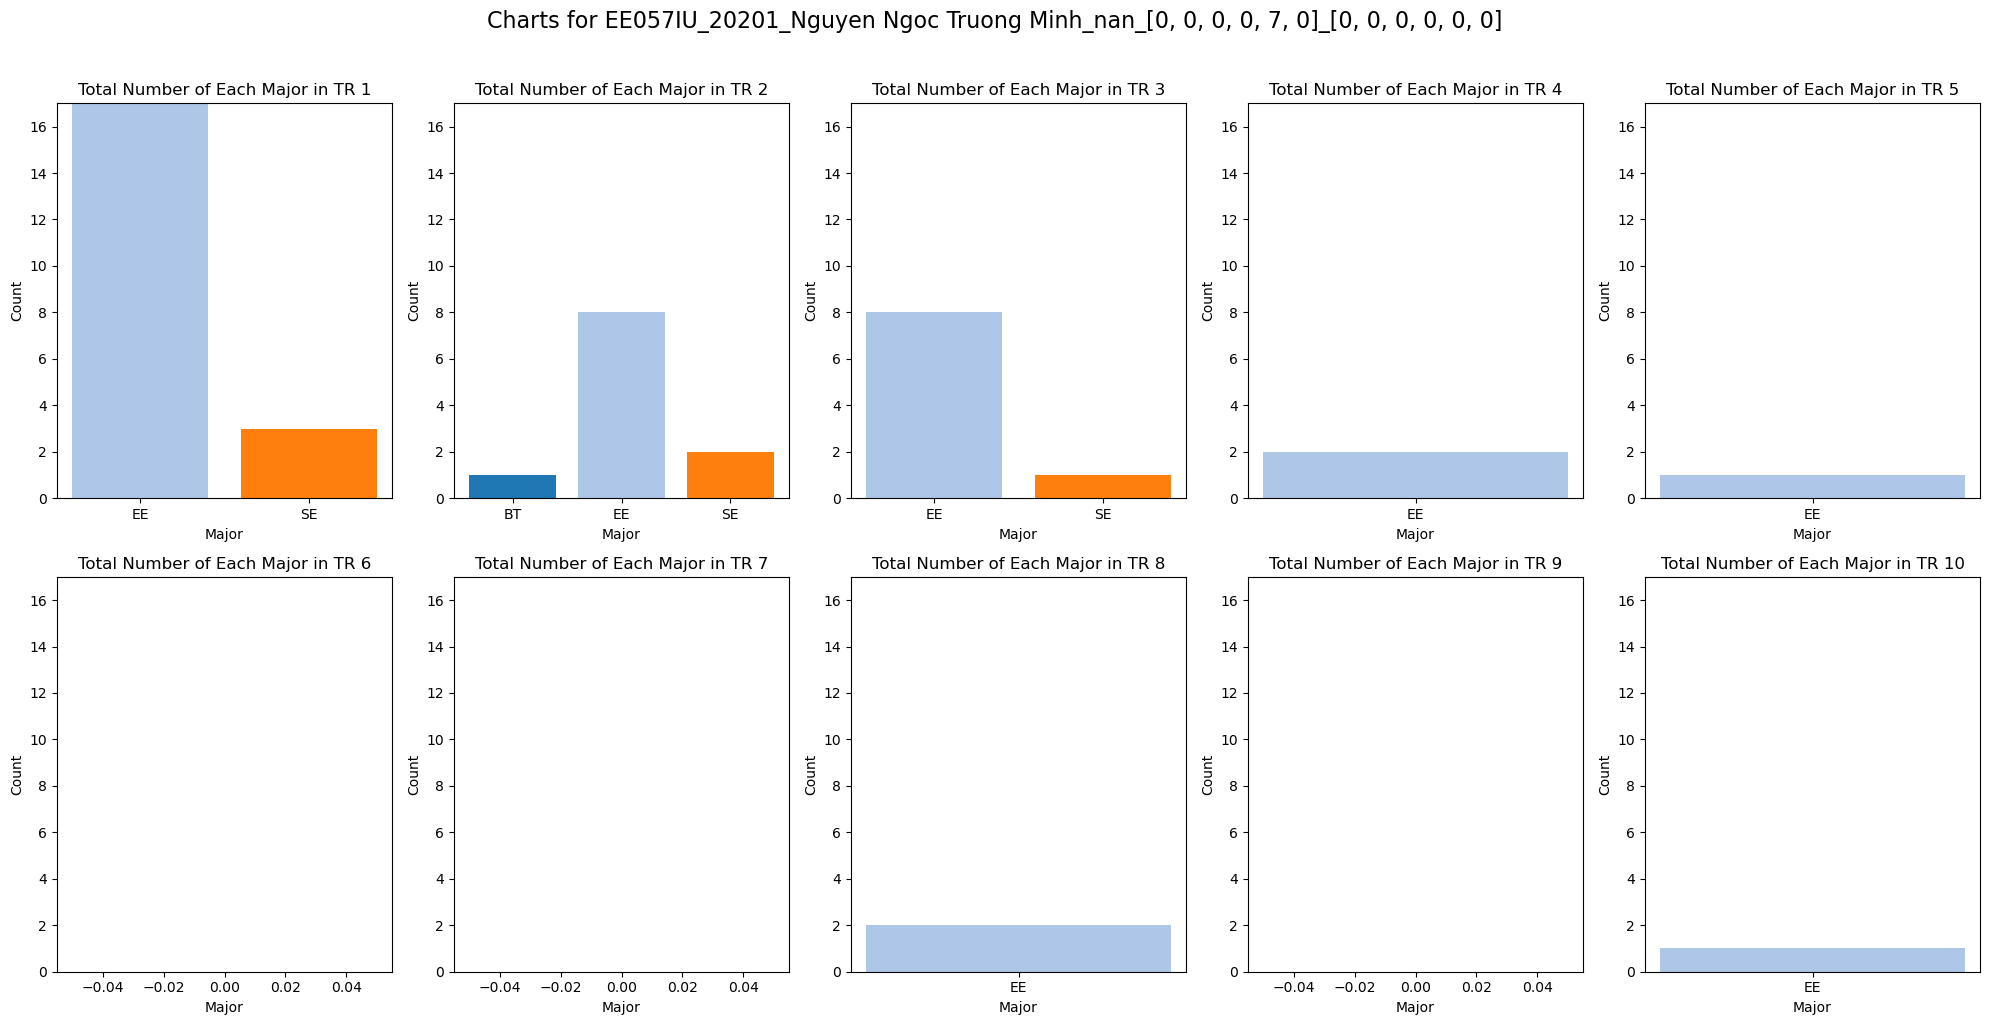

In [1329]:
# Group by 'time_range', 'Major', and 'MH_full' and count the occurrences
grouped_df_bc = filtered_df.groupby(['time_range', 'Major', 'MH_full']).size().reset_index(name='count')

# Get unique time ranges and MH_full values
time_ranges = range(1, 11) 
mh_full_values = grouped_df_bc['MH_full'].unique()

# Define the number of columns
num_cols = 5
num_rows = -(-len(time_ranges) // num_cols)  # Ceiling division to get the number of rows needed

# Find the maximum count for the y-axis limit
max_count = grouped_df_bc['count'].max()

# Create a dictionary for the color mapping if not already defined
unique_majors = grouped_df_bc['Major'].unique()
colors = plt.cm.tab20(range(len(unique_majors)))
color_dict = {val: colors[i] for i, val in enumerate(unique_majors)}

for mh_full in mh_full_values:
    # Plotting for each MH_full value
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

    # Flatten axes array for easy iteration
    axes = axes.flatten()

    for ax, time_range in zip(axes, time_ranges):
        subset = grouped_df_bc[(grouped_df_bc['time_range'] == time_range) & (grouped_df_bc['MH_full'] == mh_full)]
        ax.bar(subset['Major'], subset['count'], color=[color_dict[major] for major in subset['Major']])
        ax.set_title(f'Total Number of Each Major in TR {time_range}')
        ax.set_xlabel('Major')
        ax.set_ylabel('Count')
        ax.set_ylim(0, max_count)  # Set the y-axis limit
        ax.grid(False)  # Disable the grid

    # Add a main title for each MH_full value
    fig.suptitle(f'Charts for {mh_full}', fontsize=16, y=1.02)

    # Remove empty subplots if there are any
    for i in range(len(time_ranges), num_rows * num_cols):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

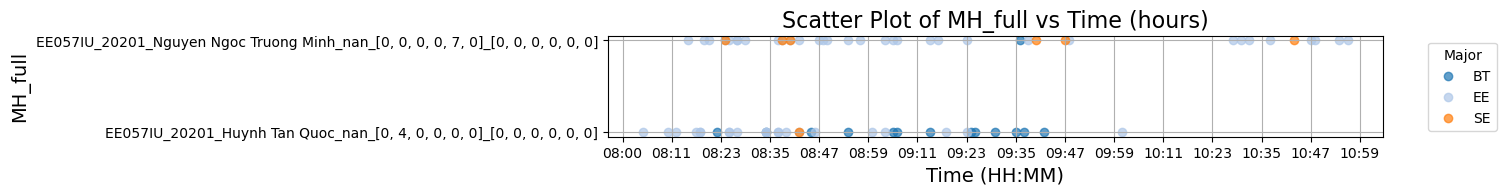

In [1330]:
# # Filter the dataframe based on Time_seconds range
# filtered_df = test_df[(test_df['Time_seconds'] >= 28800) & (test_df['Time_seconds'] <= 39600)].copy()

# # Convert Time_seconds to hours
# filtered_df['Time_hours'] = filtered_df['Time_seconds'] / 3600

# # Calculate the number of rows in the filtered DataFrame
# num_rows = len(filtered_df)

# # Determine the y-size of the plot based on the number of rows
# # ysize = max(2, num_rows * 0.005)  # Set a minimum height of 6 inches
# ysize = num_rows * 0.01 

# # Create the scatter plot
# plt.figure(figsize=(10, ysize))
# plt.scatter(filtered_df['Time_hours'], filtered_df['MH_full'], alpha=0.7)

# # Manually set the x-ticks and labels
# start_hour = 8  # 28800 seconds is 8 hours
# end_hour = 11  # 36000 seconds is 10 hours

# # Generate tick positions and labels
# tick_positions = []
# tick_labels = []
# current_hour = start_hour

# while current_hour <= end_hour:
#     tick_positions.append(current_hour)
#     tick_labels.append(f"{int(current_hour):02d}:{int((current_hour % 1) * 60):02d}")
#     current_hour += 0.2

# plt.xticks(tick_positions, tick_labels)

# plt.xlabel('Time (HH:MM)', fontsize=14)
# plt.ylabel('MH_full', fontsize=14)
# plt.title('Scatter Plot of MH_full vs Time (hours)', fontsize=16)
# plt.grid(True)
# plt.show()


# Filter the dataframe based on Time_seconds range
filtered_df = test_df[(test_df['Time_seconds'] >= 28800) & (test_df['Time_seconds'] <= 39600)].copy()

# Convert Time_seconds to hours
filtered_df['Time_hours'] = filtered_df['Time_seconds'] / 3600

# Calculate the number of rows in the filtered DataFrame
num_rows = len(filtered_df)

# Determine the y-size of the plot based on the number of rows
ysize = num_rows * 0.0175

# Create the scatter plot
plt.figure(figsize=(10, ysize))
for major in unique_majors:
    subset = filtered_df[filtered_df['Major'] == major]
    plt.scatter(subset['Time_hours'], subset['MH_full'], alpha=0.7, label=major, color=color_dict[major])

# Manually set the x-ticks and labels
start_hour = 8  # 28800 seconds is 8 hours
end_hour = 11  # 39600 seconds is 11 hours

# Generate tick positions and labels
tick_positions = []
tick_labels = []
current_hour = start_hour

while current_hour <= end_hour:
    tick_positions.append(current_hour)
    tick_labels.append(f"{int(current_hour):02d}:{int((current_hour % 1) * 60):02d}")
    current_hour += 0.2

plt.xticks(tick_positions, tick_labels)

plt.xlabel('Time (HH:MM)', fontsize=14)
plt.ylabel('MH_full', fontsize=14)
plt.title('Scatter Plot of MH_full vs Time (hours)', fontsize=16)
plt.grid(True)
# Place the legend to the right of the chart
plt.legend(title='Major', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

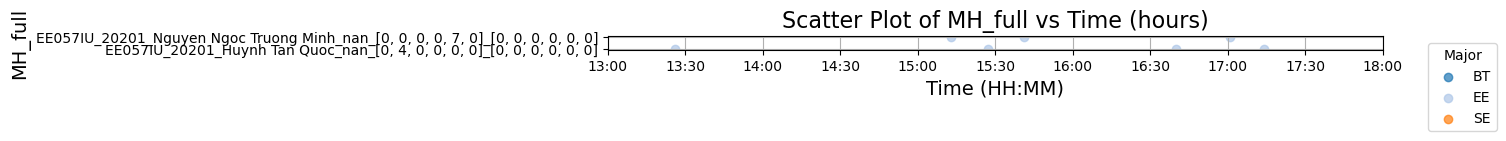

In [1331]:
# Filter the dataframe based on Time_seconds range (13:00 to 18:00)
filtered_df = test_df[(test_df['Time_seconds'] >= 46800) & (test_df['Time_seconds'] <= 64800)].copy()

# Convert Time_seconds to hours
filtered_df['Time_hours'] = filtered_df['Time_seconds'] / 3600

# Calculate the number of rows in the filtered DataFrame
num_rows = len(filtered_df)

# Determine the y-size of the plot based on the number of rows
ysize = num_rows * 0.025

# Create the scatter plot
plt.figure(figsize=(10, ysize))
for major in unique_majors:
    subset = filtered_df[filtered_df['Major'] == major]
    plt.scatter(subset['Time_hours'], subset['MH_full'], alpha=0.7, label=major, color=color_dict[major])

# Manually set the x-ticks and labels
start_hour = 13  # 46800 seconds is 13 hours
end_hour = 18  # 64800 seconds is 18 hours

# Generate tick positions and labels
tick_positions = []
tick_labels = []
current_hour = start_hour

while current_hour <= end_hour:
    tick_positions.append(current_hour)
    tick_labels.append(f"{int(current_hour):02d}:{int((current_hour % 1) * 60):02d}")
    current_hour += 0.5

plt.xticks(tick_positions, tick_labels)

plt.xlabel('Time (HH:MM)', fontsize=14)
plt.ylabel('MH_full', fontsize=14)
plt.title('Scatter Plot of MH_full vs Time (hours)', fontsize=16)
plt.grid(True)
# Place the legend to the right of the chart
plt.legend(title='Major', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

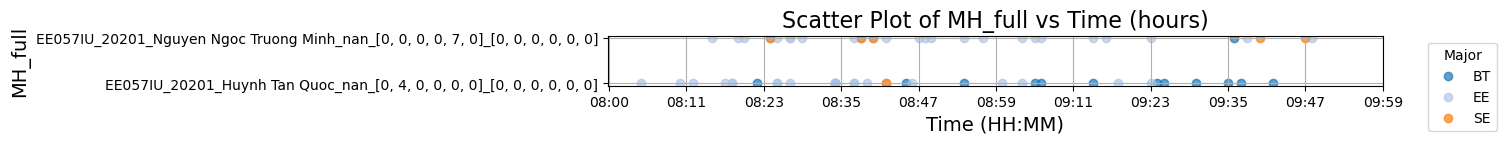

In [1332]:
# # Filter the dataframe based on Time_seconds range
# filtered_df = test_df[(test_df['Time_seconds'] >= 28800) & (test_df['Time_seconds'] <= 36000)].copy()

# # Convert Time_seconds to hours
# filtered_df['Time_hours'] = filtered_df['Time_seconds'] / 3600

# # Calculate the number of rows in the filtered DataFrame
# num_rows = len(filtered_df)

# # Determine the y-size of the plot based on the number of rows
# # ysize = max(2, num_rows * 0.005)  # Set a minimum height of 6 inches
# ysize = num_rows * 0.01 

# # Create the scatter plot
# plt.figure(figsize=(20, ysize))
# plt.scatter(filtered_df['Time_hours'], filtered_df['MH_full'], alpha=0.7)

# # Manually set the x-ticks and labels
# start_hour = 8  # 28800 seconds is 8 hours
# end_hour = 10  # 36000 seconds is 10 hours

# # Generate tick positions and labels
# tick_positions = []
# tick_labels = []
# current_hour = start_hour

# while current_hour <= end_hour:
#     tick_positions.append(current_hour)
#     tick_labels.append(f"{int(current_hour):02d}:{int((current_hour % 1) * 60):02d}")
#     current_hour += 0.2

# plt.xticks(tick_positions, tick_labels)

# plt.xlabel('Time (HH:MM)', fontsize=14)
# plt.ylabel('MH_full', fontsize=14)
# plt.title('Scatter Plot of MH_full vs Time (hours)', fontsize=16)
# plt.grid(True)
# plt.show()

# Filter the dataframe based on Time_seconds range
filtered_df = test_df[(test_df['Time_seconds'] >= 28800) & (test_df['Time_seconds'] <= 36000)].copy()

# Convert Time_seconds to hours
filtered_df['Time_hours'] = filtered_df['Time_seconds'] / 3600

# Calculate the number of rows in the filtered DataFrame
num_rows = len(filtered_df)

# Determine the y-size of the plot based on the number of rows
ysize = num_rows * 0.01

# Create the scatter plot
plt.figure(figsize=(10, ysize))
for major in unique_majors:
    subset = filtered_df[filtered_df['Major'] == major]
    plt.scatter(subset['Time_hours'], subset['MH_full'], alpha=0.7, label=major, color=color_dict[major])

# Manually set the x-ticks and labels
start_hour = 8  # 28800 seconds is 8 hours
end_hour = 10  # 36000 seconds is 10 hours

# Generate tick positions and labels
tick_positions = []
tick_labels = []
current_hour = start_hour

while current_hour <= end_hour:
    tick_positions.append(current_hour)
    tick_labels.append(f"{int(current_hour):02d}:{int((current_hour % 1) * 60):02d}")
    current_hour += 0.2

plt.xticks(tick_positions, tick_labels)

plt.xlabel('Time (HH:MM)', fontsize=14)
plt.ylabel('MH_full', fontsize=14)
plt.title('Scatter Plot of MH_full vs Time (hours)', fontsize=16)
plt.grid(True)

# Place the legend to the right of the chart
plt.legend(title='Major', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [1333]:
# Function to create the scatter plot
def create_scatter_plot(step, plot_size):
    # Filter the dataframe based on Time_seconds range
    filtered_df = test_df[(test_df['Time_seconds'] >= 28800) & (test_df['Time_seconds'] <= 39600)].copy()

    # Convert Time_seconds to hours
    filtered_df['Time_hours'] = filtered_df['Time_seconds'] / 3600

    # Calculate the number of rows in the filtered DataFrame
    num_rows = len(filtered_df)

    # Determine the y-size of the plot based on the number of rows
    # ysize = max(2, num_rows * 0.005)  # Set a minimum height of 6 inches
    ysize = num_rows * 0.01

    # Create the scatter plot with variable size
    plt.figure(figsize=(plot_size * 1.6, ysize))  # Adjust aspect ratio

    plt.scatter(filtered_df['Time_hours'], filtered_df['MH_full'], alpha=0.7)

    # Manually set the x-ticks and labels
    start_hour = 8  # 28800 seconds is 8 hours
    end_hour = 11  # 39600 seconds is 11 hours

    tick_positions = []
    tick_labels = []
    current_hour = start_hour

    while current_hour <= end_hour:
        tick_positions.append(current_hour)
        tick_labels.append(f"{int(current_hour):02d}:{int((current_hour % 1) * 60):02d}")
        current_hour += step

    plt.xticks(tick_positions, tick_labels)

    plt.xlabel('Time (HH:MM)', fontsize=14)
    plt.ylabel('MH_full', fontsize=14)
    plt.title('Scatter Plot of MH_full vs Time (hours)', fontsize=16)
    plt.grid(True)
    plt.show()

# Create interactive sliders for step size and plot size
step_slider = FloatSlider(value=0.2, min=0.1, max=1.0, step=0.1, description='Step Size:')
size_slider = FloatSlider(value=10, min=5, max=20, step=1, description='Plot Size:')

# Display the interactive plot
interact(create_scatter_plot, step=step_slider, plot_size=size_slider)

interactive(children=(FloatSlider(value=0.2, description='Step Size:', max=1.0, min=0.1), FloatSlider(value=10…

<function __main__.create_scatter_plot(step, plot_size)>